# Exercise 1
#### Correia Ambre & Jeannes Théo

In [247]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [248]:
def plot_graphs(*args):
    """
    Plots the graphs given as arguments
    
    :param args: The graphs to plot.
    Throws Exception: If there are more than 9 graphs to plot.
    """
    for G in args:
        units = args.index(G) + 1
        dizaines = len(args)
        try:
            num = 100 + dizaines * 10 + units
            plt.subplot(num)
            nx.draw(G, with_labels='True')
        except Exception as ignored:
            print('Too much graphs')
    plt.show()

In [249]:
def get_adjacency_matrix_direct_product_graph(G1,G2):
    """
    Calculates the adjacency matrix of the direct product graph of two undirected graphs
    
    :param G1: The first input graph.
    :param G2: The second input graph.
    :return: The adjacency matrix of the direct product graph.
    """
    A = nx.to_numpy_array(G1)
    B = nx.to_numpy_array(G2)
    m = A.shape[0]
    n = B.shape[0]
    P = np.zeros((m * n, m * n))

    for i in range(m):
        for j in range(n):
            for k in range(m):
                for l in range(n):
                    P[i * n + j, k * n + l] = A[i, k] * B[j, l]
    return P

In [280]:
def random_walk_kernel_similarity(G1,G2,k=4):
    """
    Compute the similarity between two graphs using the random walk kernel.
    :param G1: The first input graph.
    :param G2: The second input graph.
    :param k: Length of the random walks. Default is 4.
    :return: The similarity between the two graphs.
    """
    adjacency_one = get_adjacency_matrix_direct_product_graph(G1,G2)
    if adjacency_one.all()!= nx.to_numpy_array(nx.tensor_product(G1, G2)).all():
        raise Exception("The adjacency matrix is not correct")
    adjacencies = np.zeros((k+1,adjacency_one.shape[0],adjacency_one.shape[1]))
    adjacencies[0] = np.identity(adjacency_one.shape[0])
    adjacencies[1] = adjacency_one
    for i in range(2,k+1):
        adjacencies[i] = np.matmul(adjacency_one,adjacencies[i-1])
    return np.sum(adjacencies)

In [283]:
def print_results(graph1,graph2,graph3): 
    """
    Prints the results of the random walk kernel similarity between two graphs.
    
    :param G1: The first input graph.
    :param G2: The second input graph.
    :param G3: The second input graph.
    """
    plot_graphs(graph1,graph2,graph3)
    print(f"G1 x G2 : {random_walk_kernel_similarity(graph1,graph2)}\n"
          f"G1 x G3 : {random_walk_kernel_similarity(graph1,graph3)}")


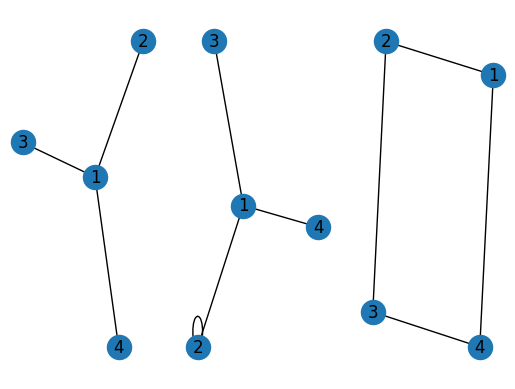

The similarity between G and G' is 2866.0, while the similarity between G' and G" is 4984.0


In [284]:
G = nx.Graph([(1,2),(1,4),(1,3)])
G_p = nx.Graph([(1,2),(1,4),(1,3),(2,2)])
G_s = nx.Graph([(1,2),(2,3),(3,4),(4,1)])
plot_graphs(G,G_p,G_s)
print(f"The similarity between G and G' is {random_walk_kernel_similarity(G,G_p)}, while the similarity between G' and G\" is {random_walk_kernel_similarity(G_p,G_s)}")

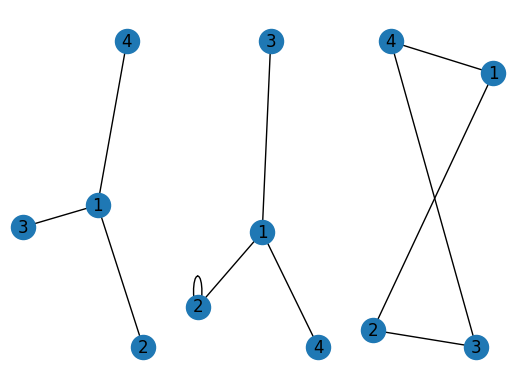

G1 x G2 : 2866.0
G1 x G3 : 3136.0


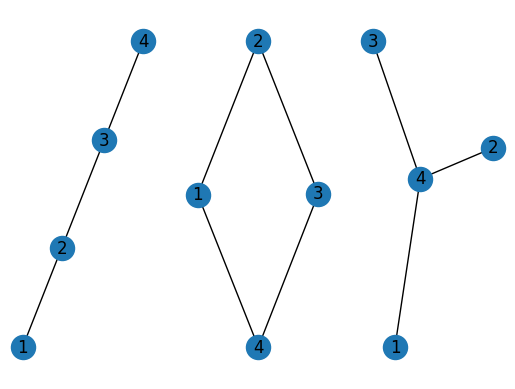

G1 x G2 : 2400.0
G1 x G3 : 1396.0


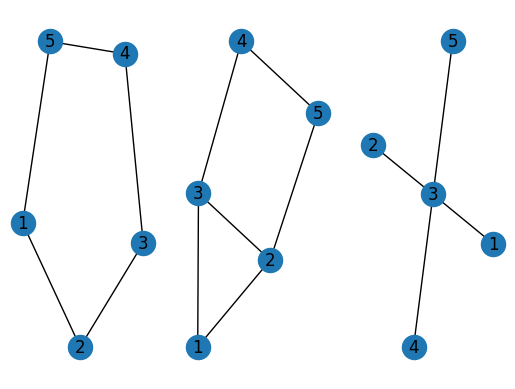

G1 x G2 : 18425.0
G1 x G3 : 8185.0


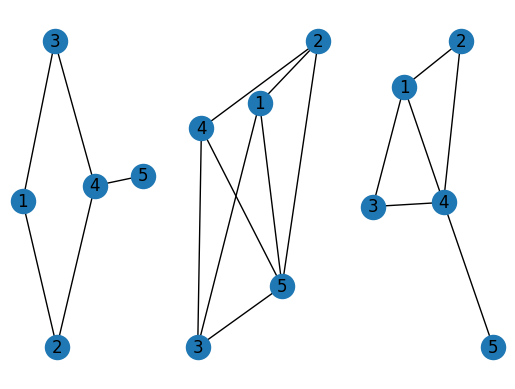

G1 x G2 : 63457.0
G1 x G3 : 29141.0


In [285]:
G1 = nx.Graph([(1,2),(2,3),(3,4)])
G2 = nx.Graph([(1,2), (2,3),(3,4),(4,1)])
G3 = nx.Graph([(1,4),(4,2),(4,3)])

G4 = nx.Graph([(1,2),(2,3),(3,4),(4,5), (5,1)])
G5 = nx.Graph([(1,2),(2,3),(3,4),(4,5),(5,2),(1,3)])
G6 = nx.Graph([(4,3),(3,1),(3,5),(3,2)])

G7 = nx.Graph([(1,2),(1,3),(3,4),(4,2),(4,5)])
G8 = nx.Graph([(1,2),(1,3),(1,5),(2,5),(2,4), (4,5),(4,3),(3,5)])
G9 = nx.Graph([(1,2),(1,3),(1,4),(4,2),(4,3),(4,5)])
print_results(G,G_p,G_s)
print_results(G1,G2,G3)
print_results(G4,G5,G6)
print_results(G7,G8,G9)

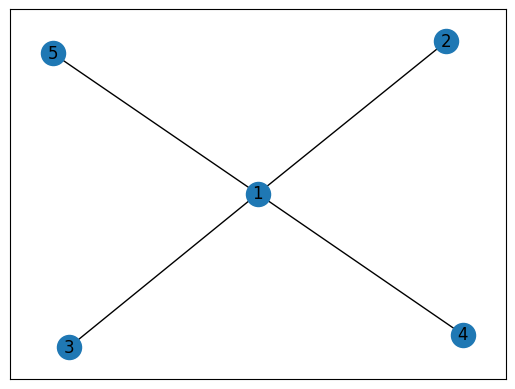

In [254]:
G1 = nx.Graph()
G1.add_nodes_from([1,2,3,4,5])
G1.add_edges_from([(1,2),(1,3),(1,4),(1,5)])
nx.draw_networkx(G1)

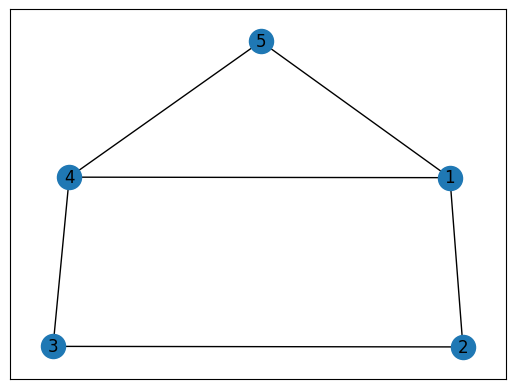

In [255]:
G2 = nx.Graph()
G2.add_nodes_from([1,2,3,4,5])
G2.add_edges_from([(1,2),(1,4),(1,5),(2,3),(3,4),(4,5)])
nx.draw_networkx(G2)

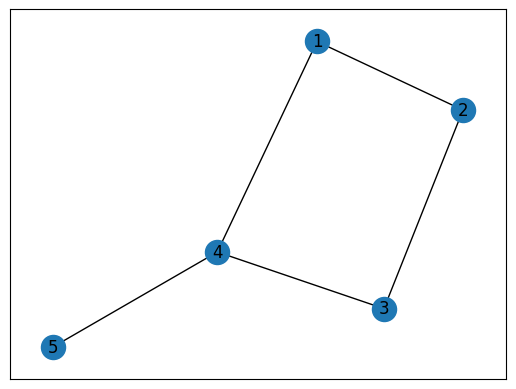

In [256]:
G3 = nx.Graph()
G3.add_nodes_from([1,2,3,4,5])
G3.add_edges_from([(1,2),(1,4),(2,3),(3,4),(4,5)])
nx.draw_networkx(G3)

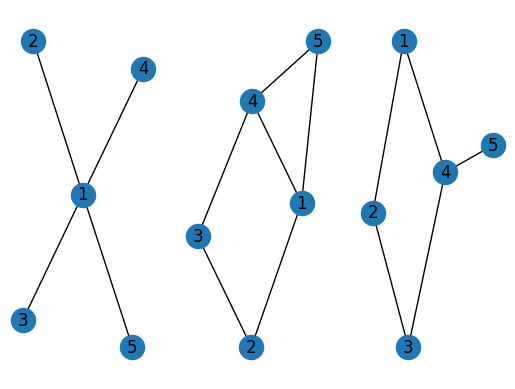

G1 x G2 : 409.0
G1 x G3 : 345.0


In [257]:
print_results(G1,G2,G3)

In [258]:
print(random_walk_kernel_similarity(G1,G2))
print(random_walk_kernel_similarity(G2,G3))
print(random_walk_kernel_similarity(G1,G3))

409.0
505.0
345.0


In [259]:
I1 = nx.Graph()
I1.add_nodes_from([1,2,3,4,5])
I1.add_edges_from([(1,2),(1,3),(1,5),(2,4),(2,3), (3,4), (3,5)])

I2 = nx.Graph()
I2.add_nodes_from([1,2,3,4,5])
I2.add_edges_from([(1,2),(1,3),(1,4),(1,5),(2,4),(2,3), (3,4), (3,5)])

I3 = nx.Graph()
I3.add_nodes_from([1,2,3,4,5])
I3.add_edges_from([(1,2),(1,3),(1,4),(1,5),(2,4)])

In [260]:
random_walk_kernel_similarity(I1,I2)
random_walk_kernel_similarity(I2,I3)

665.0